# **Project 4: LLM Project Activity - Topic Modeling**
### **Week 22** 1-Preprocessing




Choose the project topic and brainstorm for project ideas. (9.1)

**Project Topic:** Topic Modeling - develop a Topic Modeling tool that aims to automatically identify and extract underlying topics or themes from large collections of text documents.

**Theme:** Topic Modeling on 'various articles'


Configure the project workspace and access the dataset specific to the project topic. (9.2)

- Set up Google Colab to develop my project and familiarized with steps/instructions for loading file and mounting files from Google Drive.
- Located and loaded dataset for project

**Loading the dataset**

In [ ]:
from datasets import load_dataset

In [ ]:
!pip install -U fsspec datasets

  Using cached fsspec-2025.5.1-py3-none-any.whl.metadata (11 kB)


In [ ]:
#Topic Modeling dataset load
ds = load_dataset('SetFit/20_newsgroups')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/734 [00:00<?, ?B/s]

Repo card metadata block was not found. Setting CardData to empty.


train.jsonl:   0%|          | 0.00/14.8M [00:00<?, ?B/s]

test.jsonl:   0%|          | 0.00/8.91M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/11314 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/7532 [00:00<?, ? examples/s]

**Using the Dataset**

In [ ]:
#Available splits for data set
ds

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'label_text'],
        num_rows: 11314
    })
    test: Dataset({
        features: ['text', 'label', 'label_text'],
        num_rows: 7532
    })
})

Two splits are available: Train and Test. Number of rows contained in each split indicated.

In [ ]:
#First row example - Train
ds['train'][0]

{'text': 'I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.',
 'label': 7,
 'label_text': 'rec.autos'}

In [ ]:
#First row example - Test
ds['test'][0]

{'text': 'I am a little confused on all of the models of the 88-89 bonnevilles.\nI have heard of the LE SE LSE SSE SSEI. Could someone tell me the\ndifferences are far as features or performance. I am also curious to\nknow what the book value is for prefereably the 89 model. And how much\nless than book value can you usually get them for. In other words how\nmuch are they in demand this time of year. I have heard that the mid-spring\nearly summer is the best time to buy.',
 'label': 7,
 'label_text': 'rec.autos'}

In [ ]:
#Feature display - Train
ds['train'].features

{'text': Value(dtype='string', id=None),
 'label': Value(dtype='int64', id=None),
 'label_text': Value(dtype='string', id=None)}

In [ ]:
#Feature display - Test
ds['test'].features

{'text': Value(dtype='string', id=None),
 'label': Value(dtype='int64', id=None),
 'label_text': Value(dtype='string', id=None)}

In [ ]:
#Assigning dataframe to object to support additional data preprocessing (e.g., remove html tags, etc.)
import pandas as pd
ds_train = pd.DataFrame(ds['train'])
ds_test = pd.DataFrame(ds['test'])

In [ ]:
#Preprocessing step to remove HTML tags
import pandas as pd
from bs4 import BeautifulSoup

ds_train = pd.DataFrame(ds['train'])
ds_test = pd.DataFrame(ds['test'])

def remove_html(text):
    return BeautifulSoup(text, "html.parser").get_text()

#Apply  HTML cleaning to the 'text' column
ds_train['text'] = ds_train['text'].apply(remove_html)
ds_test['text'] = ds_test['text'].apply(remove_html)

#Print first few rows to check
print(ds_train.head())
print(ds_test.head())

                                                text  label  \
0  I was wondering if anyone out there could enli...      7   
1  A fair number of brave souls who upgraded thei...      4   
2  well folks, my mac plus finally gave up the gh...      4   
3  \nDo you have Weitek's address/phone number?  ...      1   
4  From article , by tombaker@world.std.com (Tom ...     14   

              label_text  
0              rec.autos  
1  comp.sys.mac.hardware  
2  comp.sys.mac.hardware  
3          comp.graphics  
4              sci.space  
                                                text  label  \
0  I am a little confused on all of the models of...      7   
1  I'm not familiar at all with the format of the...      5   
2                                \nIn a word, yes.\n      0   
3  \nThey were attacking the Iraqis to drive them...     17   
4  \nI've just spent two solid months arguing tha...     19   

              label_text  
0              rec.autos  
1         comp.windows.x  

In [ ]:
#Preprocessing step to remove punctuation
import string

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

ds_train['text'] = ds_train['text'].apply(remove_punctuation)
ds_test['text'] = ds_test['text'].apply(remove_punctuation)

print(ds_train.head())
print(ds_test.head())

                                                text  label  \
0  I was wondering if anyone out there could enli...      7   
1  A fair number of brave souls who upgraded thei...      4   
2  well folks my mac plus finally gave up the gho...      4   
3  \nDo you have Weiteks addressphone number  Id ...      1   
4  From article  by tombakerworldstdcom Tom A Bak...     14   

              label_text  
0              rec.autos  
1  comp.sys.mac.hardware  
2  comp.sys.mac.hardware  
3          comp.graphics  
4              sci.space  
                                                text  label  \
0  I am a little confused on all of the models of...      7   
1  Im not familiar at all with the format of thes...      5   
2                                  \nIn a word yes\n      0   
3  \nThey were attacking the Iraqis to drive them...     17   
4  \nIve just spent two solid months arguing that...     19   

              label_text  
0              rec.autos  
1         comp.windows.x  

In [ ]:
#Preprocessing step to remove punctuation and tokenize into lowercase individual words
import string

def preprocess_text(text):
    #If text already a list, skip processing
    if isinstance(text, list):
        return text
    #Remove punctuation and convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text.lower().split()

ds_train['text'] = ds_train['text'].apply(preprocess_text)
ds_test['text'] = ds_test['text'].apply(preprocess_text)

print(ds_train.head())
print(ds_test.head())

                                                text  label  \
0  [i, was, wondering, if, anyone, out, there, co...      7   
1  [a, fair, number, of, brave, souls, who, upgra...      4   
2  [well, folks, my, mac, plus, finally, gave, up...      4   
3  [do, you, have, weiteks, addressphone, number,...      1   
4  [from, article, by, tombakerworldstdcom, tom, ...     14   

              label_text  
0              rec.autos  
1  comp.sys.mac.hardware  
2  comp.sys.mac.hardware  
3          comp.graphics  
4              sci.space  
                                                text  label  \
0  [i, am, a, little, confused, on, all, of, the,...      7   
1  [im, not, familiar, at, all, with, the, format...      5   
2                                 [in, a, word, yes]      0   
3  [they, were, attacking, the, iraqis, to, drive...     17   
4  [ive, just, spent, two, solid, months, arguing...     19   

              label_text  
0              rec.autos  
1         comp.windows.x  

In [ ]:
#Preprocessing step to remove stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def remove_stopwords(token_list):
    return [word for word in token_list if word.lower() not in stop_words]

ds_train['text'] = ds_train['text'].apply(remove_stopwords)
ds_test['text'] = ds_test['text'].apply(remove_stopwords)

print(ds_train.head())
print(ds_test.head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                text  label  \
0  [wondering, anyone, could, enlighten, car, saw...      7   
1  [fair, number, brave, souls, upgraded, si, clo...      4   
2  [well, folks, mac, plus, finally, gave, ghost,...      4   
3  [weiteks, addressphone, number, id, like, get,...      1   
4  [article, tombakerworldstdcom, tom, baker, und...     14   

              label_text  
0              rec.autos  
1  comp.sys.mac.hardware  
2  comp.sys.mac.hardware  
3          comp.graphics  
4              sci.space  
                                                text  label  \
0  [little, confused, models, 8889, bonnevilles, ...      7   
1  [im, familiar, format, xface, thingies, seeing...      5   
2                                        [word, yes]      0   
3  [attacking, iraqis, drive, kuwait, country, wh...     17   
4  [ive, spent, two, solid, months, arguing, thin...     19   

              label_text  
0              rec.autos  
1         comp.windows.x  

In [ ]:
#Preprocessing step for lemmatization
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger_eng')

from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import pos_tag

lemmatizer = WordNetLemmatizer()

#Helper function to convert POS tags
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # default

#Lemmatize all tokenized text in ds_train['text']
def lemmatize_tokens(tokens):
    pos_tags = pos_tag(tokens)
    return [lemmatizer.lemmatize(word, get_wordnet_pos(pos)) for word, pos in pos_tags]

#Apply to entire dataset
ds_train['text_lemmatized'] = ds_train['text'].apply(lemmatize_tokens)
ds_test['text_lemmatized'] = ds_test['text'].apply(lemmatize_tokens)

print(ds_train['text_lemmatized'].head())
print(ds_test['text_lemmatized'].head())

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


0    [wonder, anyone, could, enlighten, car, saw, d...
1    [fair, number, brave, soul, upgrade, si, clock...
2    [well, folk, mac, plus, finally, give, ghost, ...
3    [weiteks, addressphone, number, id, like, get,...
4    [article, tombakerworldstdcom, tom, baker, und...
Name: text_lemmatized, dtype: object
0    [little, confused, model, 8889, bonnevilles, h...
1    [im, familiar, format, xface, thingies, see, f...
2                                          [word, yes]
3    [attack, iraqis, drive, kuwait, country, whose...
4    [ive, spent, two, solid, month, argue, thing, ...
Name: text_lemmatized, dtype: object


In [ ]:
#Complete preprocessing exploration and manipulation of data in pandas, convert DataFrames into dataset objects in preparation for use with Hugging Face API
from datasets import Dataset, DatasetDict

train = Dataset.from_pandas(ds_train)
test = Dataset.from_pandas(ds_test)

new_ds = DatasetDict({
    'train': train,
    'test': test
})

#View resulting dataset dict object
new_ds

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'label_text', 'filtered_len', 'text_lemmatized'],
        num_rows: 11314
    })
    test: Dataset({
        features: ['text', 'label', 'label_text', 'text_lemmatized'],
        num_rows: 7532
    })
})

As a last step of preprocessing, the following visualizations will reflect the current preprocessed data.

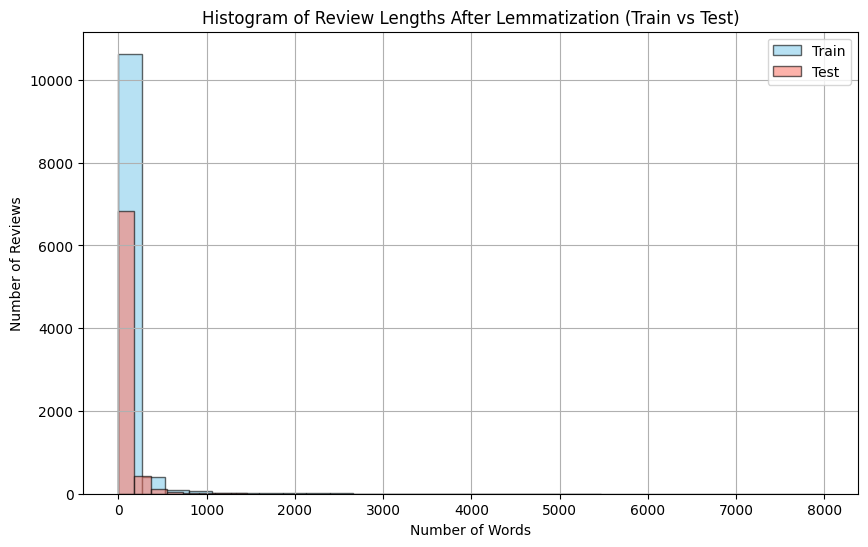

In [ ]:
#Histogram of Token Counts After Stopword Removal; Demonstrates distribution of review lengths after cleaning and how long remaining cleaned reviews are
import matplotlib.pyplot as plt

ds_train['filtered_len'] = ds_train['text_lemmatized'].apply(len)
ds_test['filtered_len'] = ds_test['text_lemmatized'].apply(len)

plt.figure(figsize=(10, 6))

plt.hist(ds_train['filtered_len'], bins=30, alpha=0.6, color='skyblue', edgecolor='black', label='Train')
plt.hist(ds_test['filtered_len'], bins=30, alpha=0.6, color='salmon', edgecolor='black', label='Test')

plt.title("Histogram of Review Lengths After Lemmatization (Train vs Test)")
plt.xlabel("Number of Words")
plt.ylabel("Number of Reviews")
plt.legend()
plt.grid(True)
plt.show()

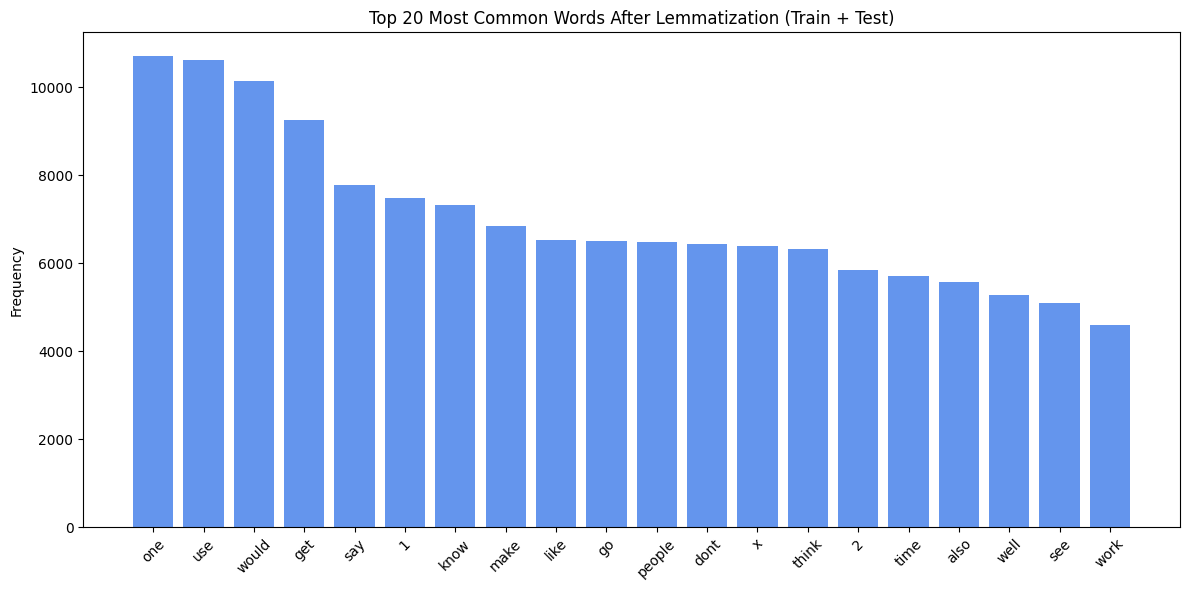

In [ ]:
#Bar Chart most common words; Demonstrates top word frequencies in cleaned outputs and quantifies outcome of preprocessing steps
import matplotlib.pyplot as plt
from collections import Counter

#Flatten lemmatized token lists from both train and test
all_words_train = [word for tokens in ds_train['text_lemmatized'] for word in tokens]
all_words_test = [word for tokens in ds_test['text_lemmatized'] for word in tokens]

#Combine all words from train and test
all_words = all_words_train + all_words_test

#Count word frequencies
word_counts = Counter(all_words)
common_words = word_counts.most_common(20)

#Unzip the most common words and counts
words, counts = zip(*common_words)

plt.figure(figsize=(12, 6))
plt.bar(words, counts, color='cornflowerblue')
plt.xticks(rotation=45)
plt.title("Top 20 Most Common Words After Lemmatization (Train + Test)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()